<h1>
<b>MakeMore : Neural Network</b>
</h1>

In [2]:
import torch
import matplotlib.pyplot as plt

In [3]:
words=[]
with open('names.txt','r') as f:
    words=f.read().splitlines()
# words
len(words)

32033

In [4]:
# prerequisites

all_chars=sorted(list(set(''.join(words))))
stoi={ch:i+1 for i,ch in enumerate(all_chars)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}      #stoi.items returns a tuple with key and value pairs
# itos

N=torch.zeros((27,27), dtype= torch.int32)
# N


In [5]:
# create the training set of all the bigrams(x,y)
xs, ys= [],[]
for w in words[:1]:
    chs=['.'] +list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1=stoi[ch1]
        ix2= stoi[ch2]
        print(ch1,ch2)
        xs.append(ix1)
        ys.append(ix2)


xs=torch.tensor(xs)
ys = torch.tensor(ys)        

. e
e m
m m
m a
a .


In [6]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [7]:
xenc.shape

torch.Size([5, 27])

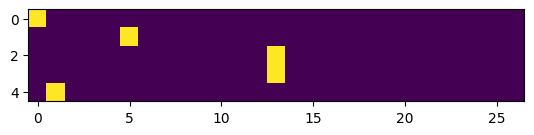

In [8]:
plt.imshow(xenc)

In [9]:
xenc.dtype

torch.float32

In [10]:
W= torch.randn((27,27))
(xenc @ W) 
# @ operator is matrix multiplication. we are doing dot product of xenc and W

tensor([[ 0.7531, -0.4017, -1.1782,  0.0069, -0.6945,  0.5091,  0.5440,  0.9185,
          1.4714, -0.1996, -0.9571,  0.3091, -0.0066, -1.3297,  0.6426,  1.1433,
          0.0638,  0.7770, -1.0253,  0.5851, -0.1194,  0.3019,  0.2331,  0.2657,
          0.3289,  0.3973, -1.5772],
        [-0.9170, -1.2716, -0.7559, -1.4792, -0.7901, -0.3576, -0.7766,  0.3768,
         -0.1854, -1.6494, -1.2642, -0.1086,  1.1364, -0.1442, -0.4928,  0.6877,
         -3.0721, -0.1740, -1.2669, -1.5358,  0.3911, -0.8186, -0.1334,  0.0329,
         -0.4463,  0.5330,  0.4349],
        [ 0.3062, -0.4646,  0.0305,  1.4217, -0.1976,  0.5640, -0.7258, -1.0762,
          0.2029,  0.4462, -1.6788,  1.2280, -0.8516,  0.5966, -0.4052,  0.1767,
          0.4723,  0.8512,  0.0592, -1.7091, -0.4680, -0.0806,  0.3697,  0.5634,
         -0.1501,  1.8996, -0.3242],
        [ 0.3062, -0.4646,  0.0305,  1.4217, -0.1976,  0.5640, -0.7258, -1.0762,
          0.2029,  0.4462, -1.6788,  1.2280, -0.8516,  0.5966, -0.4052,  0.1767

In [11]:
logits= xenc @ W        # log- counts
counts = logits.exp()   # equivalent to tensor N in bigram
probs = counts/counts.sum(1, keepdims= True)
probs

tensor([[0.0574, 0.0181, 0.0083, 0.0272, 0.0135, 0.0450, 0.0466, 0.0677, 0.1177,
         0.0221, 0.0104, 0.0368, 0.0268, 0.0072, 0.0514, 0.0848, 0.0288, 0.0588,
         0.0097, 0.0485, 0.0240, 0.0366, 0.0341, 0.0353, 0.0376, 0.0402, 0.0056],
        [0.0179, 0.0126, 0.0210, 0.0102, 0.0203, 0.0313, 0.0206, 0.0653, 0.0372,
         0.0086, 0.0126, 0.0402, 0.1395, 0.0388, 0.0274, 0.0891, 0.0021, 0.0376,
         0.0126, 0.0096, 0.0662, 0.0197, 0.0392, 0.0463, 0.0287, 0.0763, 0.0692],
        [0.0346, 0.0160, 0.0263, 0.1055, 0.0209, 0.0448, 0.0123, 0.0087, 0.0312,
         0.0398, 0.0048, 0.0870, 0.0109, 0.0462, 0.0170, 0.0304, 0.0408, 0.0597,
         0.0270, 0.0046, 0.0160, 0.0235, 0.0369, 0.0447, 0.0219, 0.1702, 0.0184],
        [0.0346, 0.0160, 0.0263, 0.1055, 0.0209, 0.0448, 0.0123, 0.0087, 0.0312,
         0.0398, 0.0048, 0.0870, 0.0109, 0.0462, 0.0170, 0.0304, 0.0408, 0.0597,
         0.0270, 0.0046, 0.0160, 0.0235, 0.0369, 0.0447, 0.0219, 0.1702, 0.0184],
        [0.0061, 0.0258,

In [12]:
probs.shape

torch.Size([5, 27])

In [13]:
probs[0].sum()

tensor(1.0000)

In [14]:
'''
Summary till now: Doing above steps:
'''

'\nSummary till now: Doing above steps:\n'

In [15]:
xs

tensor([ 0,  5, 13, 13,  1])

In [16]:
ys

tensor([ 5, 13, 13,  1,  0])

In [17]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g)

In [18]:

xenc=F.one_hot(xs, num_classes=27).float()      #input to the neural network : one- hot encoding
logits= xenc @W         #predict log_counts
counts= logits.exp()        #counts, equivalent to N in bigram model
probs= counts/counts.sum(1, keepdims= True)     #probabilities for next character
#last two lines here are together called a 'softmax'



In [19]:
probs.shape

torch.Size([5, 27])

In [39]:
nlls= torch.zeros(5)
for i in range(5):
    # i-th bigram:
    x = xs[i].item()  #input character index
    y = ys[i].item()    # label character index
    print('-------------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]}(indexes {x},{y})')
    print('input to the neural net: ',x)
    print('output probabilities from the neural net: ', probs[i])
    print('label (actual next character): ', y)
    p= probs[i,y]
    print('probability assigned by the net to the correct character: ', p.item())
    logp=torch.log(p)
    print('log likelihood: ', logp.item())
    nll= -logp
    print('negative log likelihood: ',nll.item())
    nlls[i]=nll
print('==================')
print('average negative log likelihood, i.e. loss=', nlls.mean().item())

-------------
bigram example 1: .e(indexes 0,5)
input to the neural net:  0
output probabilities from the neural net:  tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
       grad_fn=<SelectBackward0>)
label (actual next character):  5
probability assigned by the net to the correct character:  0.012286253273487091
log likelihood:  -4.3992743492126465
negative log likelihood:  4.3992743492126465
-------------
bigram example 2: em(indexes 5,13)
input to the neural net:  5
output probabilities from the neural net:  tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
       grad_fn=<SelectBackward0>)
label (actual n

-----------!!! OPTIMIZATION !!! yay------------

In [40]:
# forward pass

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)           # requires_grad has to be true because we want to find gradients later for optimization(grad descent)


xenc=F.one_hot(xs, num_classes=27).float()      #input to the neural network : one- hot encoding
logits= xenc @W         #predict log_counts
counts= logits.exp()        #counts, equivalent to N in bigram model
probs= counts/counts.sum(1, keepdims= True)     #probabilities for next character
#last two lines here are together called a 'softmax'

In [41]:
probs.shape

torch.Size([5, 27])

In [42]:
probs[0,5], probs[1,13], probs[2,13], probs[3,1], probs[4,0]

(tensor(0.0123, grad_fn=<SelectBackward0>),
 tensor(0.0181, grad_fn=<SelectBackward0>),
 tensor(0.0267, grad_fn=<SelectBackward0>),
 tensor(0.0737, grad_fn=<SelectBackward0>),
 tensor(0.0150, grad_fn=<SelectBackward0>))

In [43]:
# we can do above cell process differently as follows:
torch.arange(5)
probs[torch.arange(5), ys]      #this is prob... we want log prob , then we will take mean() then put negative... i.e. we get nll as following cell


tensor([0.0123, 0.0181, 0.0267, 0.0737, 0.0150], grad_fn=<IndexBackward0>)

In [44]:
loss= -probs[torch.arange(5), ys].log().mean()
loss.item()

3.7693049907684326

In [45]:
# Backward pass
W.grad=None     # set the gradient to zero, we can also set it to zero but None is better ;)
loss.backward() 

In [38]:
W.grad

tensor([[ 0.0121,  0.0020,  0.0025,  0.0008,  0.0034, -0.1975,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0476,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0292],
        [-0.1970,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0217,  0.0026,
          0.0025,  0.0010,  0.0205,  0.0017,  0.0198,  0.0022,  0.0046,  0.0041,
          0.0082,  0.0016,  0.0180,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0131,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [46]:
W.shape

torch.Size([27, 27])

In [47]:
# update

W.data+= -0.1 * W.grad

In [48]:
 print(loss.item())

3.7693049907684326


Here we are dealing with classification model, so loss calculation is done by negative log likelihood.<br>
In case of   Regression models, we would have used RMSE or MSE. ref torch_prac.ipynb 

<h1>Optimization !! (actually)</h1><p>Putting all the steps together now. i.e. create dataset, gradeint descent, </p>

In [53]:
#create the dataset
xs, ys= [],[]
for w in words:
    chs=['.']+ list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1= stoi[ch1]
        ix2= stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs= torch.tensor(xs)
ys= torch. tensor(ys)
num= xs.nelement()
print('number of examples: ', num)

# initialize the 'network' 
g= torch.Generator().manual_seed(2147483647)
W= torch.randn((27,27), generator= g, requires_grad=True)

number of examples:  228146


In [59]:
(W**2).mean()

tensor(2.3961, grad_fn=<MeanBackward0>)

In [57]:
# gradient descent 
for k in  range(100):        # no of loops/ passes
    
    #forward pass
    xenc= F.one_hot(xs, num_classes=27).float()     #input to the network: one-hot encoding
    logits= xenc @ W        # predict log-counts
    counts= logits.exp()    #counts, equivalent to N
    probs= counts / counts.sum(1, keepdims= True)   # probabilities for next character
    loss= -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
    print(loss.item())

    #backward pass
    W.grad= None            #set the gradients to zero
    loss.backward()

    #update
    W.data += -50 * W.grad


2.4618985652923584
2.4618561267852783
2.4618144035339355
2.46177339553833
2.4617323875427246
2.4616918563842773
2.4616518020629883
2.4616119861602783
2.4615728855133057
2.461534023284912
2.4614953994750977
2.4614572525024414
2.4614193439483643
2.461381673812866
2.4613449573516846
2.461308240890503
2.4612720012664795
2.461236000061035
2.46120023727417
2.461164712905884
2.461129665374756
2.461095094680786
2.4610605239868164
2.461026668548584
2.4609928131103516
2.4609596729278564
2.4609262943267822
2.460893392562866
2.4608609676361084
2.4608285427093506
2.46079683303833
2.4607648849487305
2.460733413696289
2.460702896118164
2.4606716632843018
2.4606411457061768
2.46061110496521
2.460580825805664
2.4605510234832764
2.4605214595794678
2.460491895675659
2.460462808609009
2.4604344367980957
2.4604058265686035
2.4603774547576904
2.4603493213653564
2.4603214263916016
2.4602935314178467
2.460266351699829
2.4602391719818115
2.460212469100952
2.4601855278015137
2.4601590633392334
2.460132360458374

In [62]:
# finally sample from the ' neural net' model
g= torch.Generator().manual_seed(2147483647)
for i in range(10):

    out= []
    ix= 0
    while True:
        xenc= F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits= xenc @ W    # predict log-counts
        counts= logits.exp()    # counts, equivalent to N
        p= counts / counts.sum(1, keepdims=True)    # probabilities for next character

        ix= torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix== 0:
            break 
    print(''.join(out))

junide.
janasah.
prelay.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
